# We start the project social media text preprocessing

## Text Preprocessing (Clean Data)

In [2]:
import pandas as pd
import string
df = pd.read_csv(r'C:\Users\HawrazAbdallaShawry\Desktop\Natural Language Processing(NLP) Concepts\Twitter Sentiments.csv')
# drop the columns
print(df)
df = df.drop(columns=['id'], axis=1)
df.head()

        id  label                                              tweet
0        1      0   @user When a father is dysfunctional and is S...
1        2      0  @user @user thanks for #lyft credit i can't us...
2        3      0                                bihday your majesty
3        4      0  #model   i love u take with u all the time in ...
4        5      0             factsguide: society Now    #motivation
...    ...    ...                                                ...
9993  9994      0  finally, halo wars 2! waiting for players now,...
9994  9995      1  are you #black &amp; feel like the  are stompi...
9995  9996      0   @user my routine is out of whack! evening wal...
9996  9997      0  i'm dead but still happy #poledance #madrid ##...
9997  9998      0   â #united kingdom claimant count rate up to...

[9998 rows x 3 columns]


,label,tweet
0,0,@user When a father is dysfunctional and is S...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society Now #motivation


## convert to lowercase

In [3]:
df['clean_text'] = df['tweet'].str.lower()
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society Now #motivation,factsguide: society now #motivation


## Removal of Punctuations لابردنی ئیشارەکان

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
import string 
import timeit
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
print(df.head())

   label                                              tweet  \
0      0   @user When a father is dysfunctional and is S...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society Now    #motivation   

                                          clean_text  
0   user when a father is dysfunctional and is so...  
1  user user thanks for lyft credit i cant use ca...  
2                                bihday your majesty  
3  model   i love u take with u all the time in u...  
4               factsguide society now    motivation  


## بۆ دۆزینەوەی تایمی هەر پرۆسەیەك 
time_method1 = timeit.timeit(lambda: df['clean_text'].apply(remove_punctuations), number=1000)
print(f"Execution time for Method 1: {time_method1} seconds")
Execution time for Method 1: 215.46361050003907 seconds

## Removal of Stopwords

In [6]:
from nltk.corpus import stopwords
stopwords_string = ", ".join(stopwords.words('english'))
print(stopwords_string)

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [7]:
import nltk
from nltk.tokenize import word_tokenize
#لیستی ستۆپ وۆڕدەکان
nltk.download('stopwords')
#بۆ تۆکێنایز
nltk.download('punkt')
#پێشتر پڕۆسەی تۆکێنایز بە سپلیت کرابوو من گۆڕیم بەم وێرد تۆکێنایز
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HawrazAbdallaShawry\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HawrazAbdallaShawry\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)
print(df.head())

   label                                              tweet  \
0      0   @user When a father is dysfunctional and is S...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society Now    #motivation   

                                          clean_text  
0  user father dysfunctional selfish drags kids d...  
1  user user thanks lyft credit cant use cause do...  
2                                     bihday majesty  
3  model love u take u time urð± ðððð...  
4                      factsguide society motivation  


## Removal of Frequent Words/رەشکردنەوەی وشە دووبارەکان

In [9]:
from collections import Counter
word_count = Counter()
for text in df['clean_text']:
    for word in word_tokenize(text):
        word_count[word] += 1       
word_count.most_common(10)

[('user', 5465),
 ('love', 839),
 ('day', 658),
 ('happy', 552),
 ('amp', 501),
 ('u', 405),
 ('im', 356),
 ('today', 346),
 ('life', 343),
 ('time', 339)]

In [10]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(10))
def remove_freq_words(text):
    return " ".join([word for word in word_tokenize(text) if word not in FREQUENT_WORDS])

In [11]:
df['clean_text'] = df['clean_text'].apply(lambda x: remove_freq_words(x))
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model take urð± ðððð ð¦ð¦ð¦
4,0,factsguide: society Now #motivation,factsguide society motivation


## Removal of Rare Words|لابردنی وشە دەگمەنەکان

In [12]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'accomplice',
 'breasts',
 'claimant',
 'completly',
 'deleting',
 'halo',
 'protester',
 'protocol',
 'whack'}

In [13]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in RARE_WORDS])

In [14]:
df['clean_text'] = df['clean_text'].apply( remove_rare_words)
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model take urð± ðððð ð¦ð¦ð¦
4,0,factsguide: society Now #motivation,factsguide society motivation


## Removal of Special characters

In [15]:
import re
special_characters = string.punctuation
print(special_characters)

def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\\s+', ' ', text)
    return text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
df['clean_text'] = df['clean_text'].apply(remove_spl_chars)
df.head()

,label,tweet,clean_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model take ur
4,0,factsguide: society Now #motivation,factsguide society motivation


## ڕەشکردنەوەی عەرفە زۆر دووبارەکانI gooottoooo as example ..

In [17]:
def remove_words_with_consecutive_chars(text, consecutive_threshold=3):
    pattern = re.compile(r'\b\w*([a-zA-Z])\1{2,}\w*\b')
    return re.sub(pattern, '', text)
df['clean_text'] = df['clean_text'].apply(remove_words_with_consecutive_chars)
print(df[['clean_text']])

                                             clean_text
0     father dysfunctional selfish drags kids dysfun...
1     thanks lyft credit cant use cause dont offer w...
2                                        bihday majesty
3                                        model take ur 
4                         factsguide society motivation
...                                                 ...
9993  finally wars 2 waiting players first game hype...
9994      black feel like stomping retweet tampa miami 
9995  routine evening walk walk beach sunset clouds ...
9996  dead still poledance madrid fitness madrid sec...
9997   united kingdom count rate 22 may previous 21 ...

[9998 rows x 1 columns]


## هەر بە زۆر بەبێ گوێدان بە ڕاستی و دروستی زمانەوانی پاشگر و پێشگر لادەبات

In [18]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in word_tokenize(text)])

In [19]:
df['stemmed_text'] = df['clean_text'].apply(stem_words)
df.head()

,label,tweet,clean_text,stemmed_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...,father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...
2,0,bihday your majesty,bihday majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model take ur,model take ur
4,0,factsguide: society Now #motivation,factsguide society motivation,factsguid societi motiv


## Removal of URLs

In [20]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)
df['stemmed_text'] = df['stemmed_text'].apply(lambda x: remove_urls(x))
df.head()

,label,tweet,clean_text,stemmed_text
0,0,@user When a father is dysfunctional and is S...,father dysfunctional selfish drags kids dysfun...,father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...,thank lyft credit cant use caus dont offer whe...
2,0,bihday your majesty,bihday majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model take ur,model take ur
4,0,factsguide: society Now #motivation,factsguide society motivation,factsguid societi motiv


## Spelling Correction

In [42]:
## کاتێکی زۆری پێویستە بۆ ئەنجامدانی دوای ئەنجامدانی لە کۆدەکەم کپی دەکەم چونکە ئەنجامەکەیم لە فایلێکی تر خەزن کردووە 
import pandas as pd
from textblob import TextBlob
import pandas as pd
def correct_spelling(text):
    if pd.isna(text) or isinstance(text, float):
        return ""
    blob = TextBlob(str(text)) 
    corrected_text = ' '.join([word.correct() for word in blob.words])
    return corrected_text

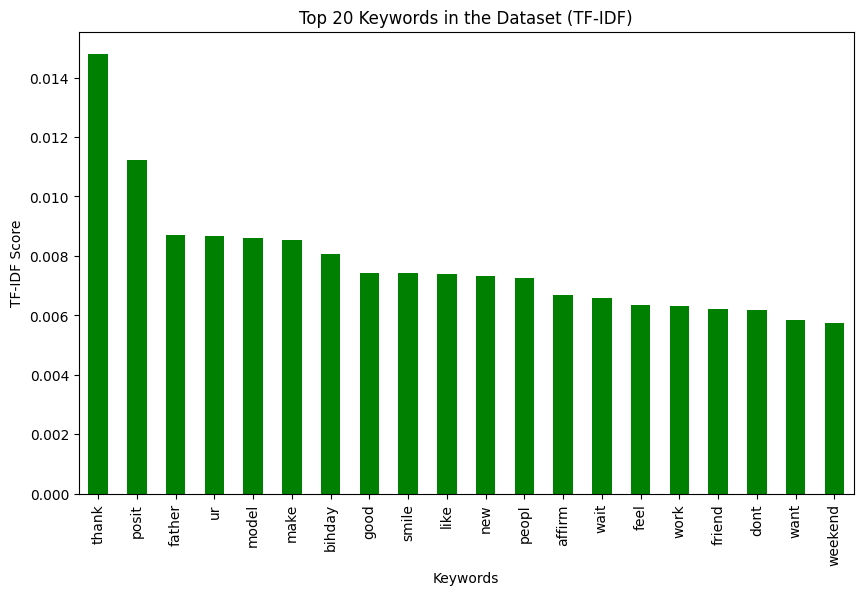

In [37]:
text_data = df['stemmed_text']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = 20
top_keywords_data = tfidf_df.mean().sort_values(ascending=False).head(top_keywords)
plt.figure(figsize=(10, 6))
top_keywords_data.plot(kind='bar', color='green')
plt.title(f'Top {top_keywords} Keywords in the Dataset (TF-IDF)')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.show()

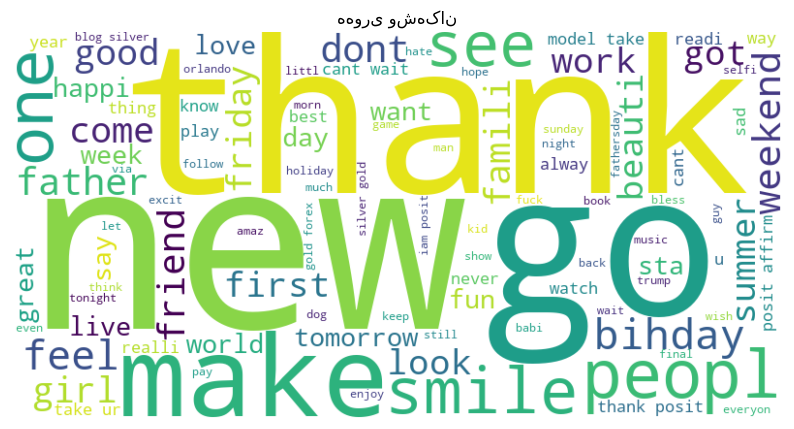

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_data = df['stemmed_text']
all_text = ' '.join(text_data)
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('هەوری وشەکان')
plt.show()

## Feature Extraction from Text Data and Topic modeling

In [21]:
print(df.columns)


Index(['label', 'tweet', 'clean_text', 'stemmed_text'], dtype='object')


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

corpus = df['stemmed_text']
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(corpus)

# Initialize and fit an LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f"Topic {i + 1}: {', '.join(top_words)}")


Topic 1: thank, posit, smile, bihday, beauti, affirm, need, iam, cute, bear
Topic 2: father, wait, work, friend, like, feel, dad, final, alway, dont
Topic 3: blog, peopl, orlando, trump, gold, silver, forex, hate, sad, year
Topic 4: new, healthi, good, come, day, know, feel, bihday, altwaystoh, heal
Topic 5: want, look, make, ur, model, bull, realli, summer, girl, thing


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

corpus = df['stemmed_text']

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(corpus)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

new_post = ["Feeling excited about the weekend!"]
preprocessed_new_post = preprocess_text(new_post[0])

new_post_features = vectorizer.transform([preprocessed_new_post])
print(f"Number of features in the vectorizer: {len(vectorizer.get_feature_names_out())}")

new_post_topic_distribution = lda.transform(new_post_features)

print("Topic distribution of the new post:")
print(new_post_topic_distribution)

Number of features in the vectorizer: 5371
Topic distribution of the new post:
[[0.59200933 0.10409348 0.10003195 0.10126738 0.10259785]]


In [26]:
new_dataset = df[['label', 'stemmed_text']]
new_dataset.to_csv('corrected_dataset1.csv', index=False)

In [88]:
#///////////////////////////////////////////////////////////////
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = pd.read_csv(r'C:\Users\HawrazAbdallaShawry\Desktop\Daata Science Project\Social Media Text Preprocessing\corrected_dataset1.csv')
# We have to create new label because orginal label is not right ..
#//////////////////////////////////////////////////////////
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['stemmed_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'] if pd.notnull(x) else 0)
df['labeel'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')
df = df.drop(columns=['sentiment_score'])
#/////////////////////////////////////////////////////////
text_column = 'stemmed_text'
label_column = 'labeel'

df[text_column].fillna('', inplace=True)

STOPWORDS = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(str(text))  
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in STOPWORDS]
    return ' '.join(words)

df[text_column] = df[text_column].apply(preprocess_text)

X = df[text_column]
y = df[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

svm_classifier = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_vectorized, y_train_encoded)


best_svm_classifier = grid_search_svm.best_estimator_

y_pred_svm = best_svm_classifier.predict(X_test_vectorized)

y_pred_decoded = label_encoder.inverse_transform(y_pred_svm)


accuracy_svm = accuracy_score(y_test, y_pred_decoded)
print(f"Best SVM Model Accuracy: {accuracy_svm:.2f}")
print(f'Accuracy: {int(accuracy_svm * 100)}%')  # Corrected variable name
#print("Best SVM Model Classification Report:")
#print(classification_report(y_test, y_pred_decoded))

Best SVM Model Accuracy: 0.91
Accuracy: 90%


In [94]:
new_post = "i feel bad becuase nothing"

preprocessed_new_post = preprocess_text(new_post)
X_new = vectorizer.transform([preprocessed_new_post])
predicted_class = best_svm_classifier.predict(X_new)
predicted_sentiment = label_encoder.inverse_transform(predicted_class)
print("New Post:", new_post)
print("Predicted Sentiment:", predicted_sentiment)

New Post: i feel bad becuase nothing
Predicted Sentiment: ['negative']


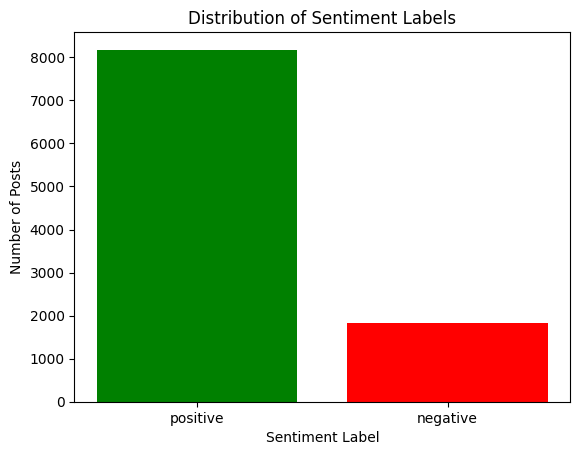

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with 'labeel' column
# If your label column is named 'label', replace 'labeel' with 'label' in the code

# Count the occurrences of each label
label_counts = df['labeel'].value_counts()

# Create a bar plot
plt.bar(label_counts.index, label_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.title('Distribution of Sentiment Labels')

# Show the plot
plt.show()